# Data@ANZ Virtual Internship Challenge

## The goal of this challenge is to perform some exploratory analysis on the synthesized dataset provided by ANZ and derive meaningful insights. 

### Step 1: Environment Setup
I'll be using Jupyter Notebook with Python to perform the analysis and hence will import all the necessary libraries. 

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pre_processing import * # My custom code which helps me in data processing. Importing it to keep the notebook clean.

from IPython.display import display

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

### Step 2: Basic exploratory analysis and data cleanup. 

In [3]:
# I read the data into a dataframe and display the first 5 rows.
df=pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
#This cell will show the types of non-null objects in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

In [5]:
# This cell will give the basic stats of all the numeric columns
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


As it can be seen, the mean age of the customer base is 30 and a mean account balance of $ 14704. ALso, it can be seen that there's a huge gap in the account balances of the customers.

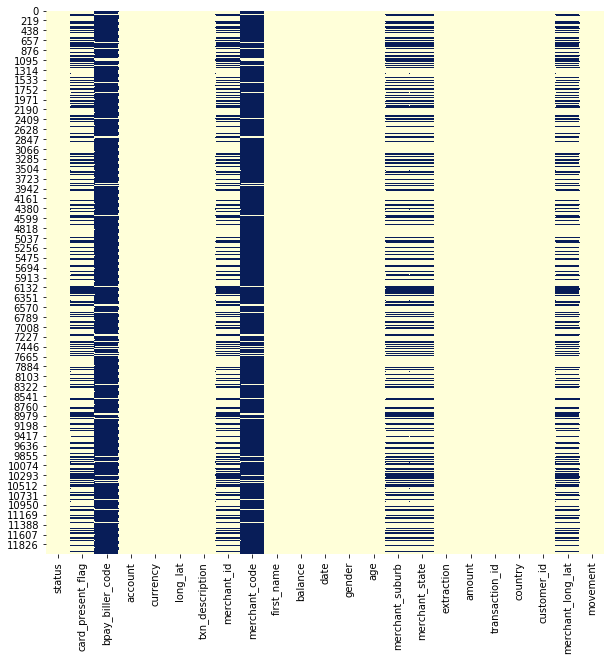

In [6]:
# Let's see how many null elements are contained in the data
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cbar = False, cmap = 'YlGnBu')

The blue lines in the figure above show the missing values. Few of the columns have considerable amount of missing data and hence can't be really used to derive any insight. Apart from these, columns like 'currency' 'country' also make no sense as they only have one unique value. Hence I'll remove these columns.

In [4]:
df.drop(['bpay_biller_code','merchant_code','currency','country','date'],axis=1,inplace=True)
df.columns

Index(['status', 'card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat', 'movement'],
      dtype='object')

Latitude and longitude would be of no help if they're in strings, to I do some processing to convert these columns into meaningful ones. 

In [12]:
df['long_lat'].head()

0    153.41 -27.95
1    153.41 -27.95
2    151.23 -33.94
3    153.10 -27.66
4    153.41 -27.95
Name: long_lat, dtype: object

In [5]:
df[['Long','Lat']] = df.long_lat.str.split(expand=True) 
df=df.drop(['long_lat'],axis=1)

In [6]:
df[['Merchant_Long','Merchant_Lat']] = df.merchant_long_lat.str.split(expand=True) 
df=df.drop(['merchant_long_lat'],axis=1)

In [7]:
df[['Merchant_Long','Merchant_Lat','Long','Lat']] = df[['Merchant_Long','Merchant_Lat','Long','Lat']].apply(pd.to_numeric)

### Step 3: EDA

I will begin by plotting the histogram for the transaction amounts. It'll be better if I seperate the credit and the debit transactions.

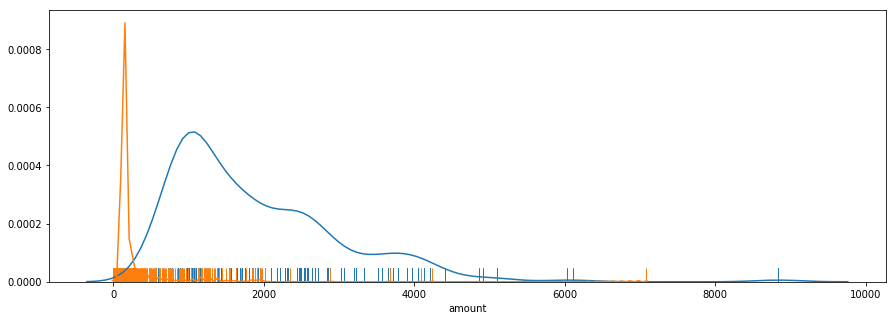

In [157]:
plt.figure(figsize = (15, 5))
sns.distplot(df[df['movement']=='credit']['amount'], hist=False, rug=True)
sns.distplot(df[df['movement']=='debit']['amount'], hist=False, rug=True)

As it can be seen, most customers in the dataset receive an amount which is less than $ 500. Although, a great deal of outliers exist as well. We may have to normalize this so the outliers can be analyzed as well. 

The debit transactions are somewhat better spread and even though outliers exist, most of the transactions are in the range 0 to 5000. 

To use the extraction column, I'll first covert it to a datetime format and add a few more columns. 

In [16]:
df.extraction = pd.to_datetime(df.extraction)

In [ ]:
df.extra

In [133]:
add_datepart(df,'extraction')
df.columns

Index(['status', 'card_present_flag', 'account', 'txn_description',
       'merchant_id', 'first_name', 'balance', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'amount', 'transaction_id',
       'customer_id', 'movement', 'Long', 'Lat', 'Merchant_Long',
       'Merchant_Lat', 'extractionYear', 'extractionMonth', 'extractionWeek',
       'extractionDay', 'extractionDayofweek', 'extractionDayofyear',
       'extractionIs_month_end', 'extractionIs_month_start',
       'extractionIs_quarter_end', 'extractionIs_quarter_start',
       'extractionIs_year_end', 'extractionIs_year_start',
       'extractionElapsed'],
      dtype='object')

In [136]:
df['extractionMonth'].nunique()

3

Let's see how the type of debit transctions are spread across the three months. 'PHONE BANK' had the most amount of average transactions for August and September, but surprisingly it fell significantly in the month of October. 

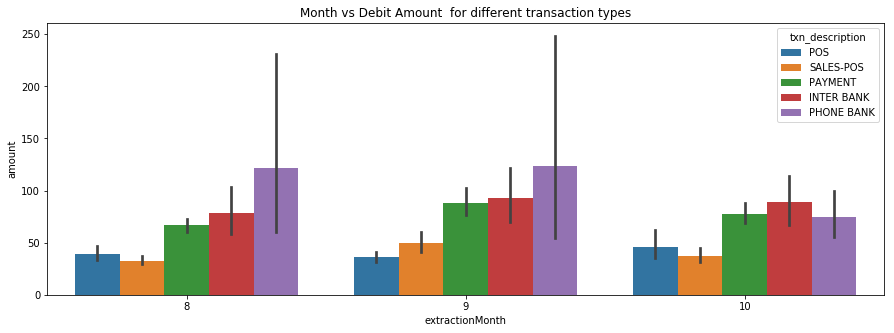

In [291]:
plt.figure(figsize = (15, 5))
sns.barplot(x="extractionMonth",y=df['amount'],hue='txn_description',data=df[df['movement']=='debit']).set_title('Month vs Debit Amount  for different transaction types')
plt.savefig('month vs amount.png')

Let's see the same for different days of the week.  

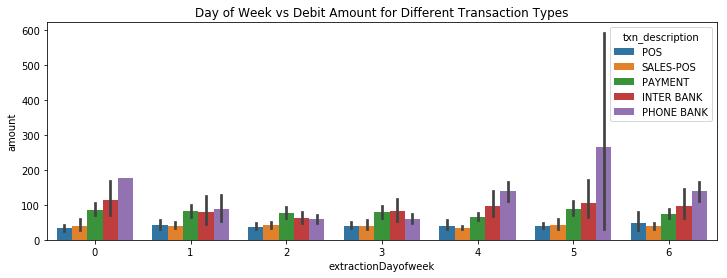

In [295]:
plt.figure(figsize = (12, 4))
sns.barplot(x="extractionDayofweek",y=df['amount'],hue='txn_description',data=df[df['movement']=='debit']).set_title('Day of Week vs Debit Amount for Different Transaction Types')
plt.savefig('DoW vs Amount.png')

Phone Bank is surely the king. But somehow it shoots up during Saturdays. 

Lets plot a scatterplot and see how people spend their money. 

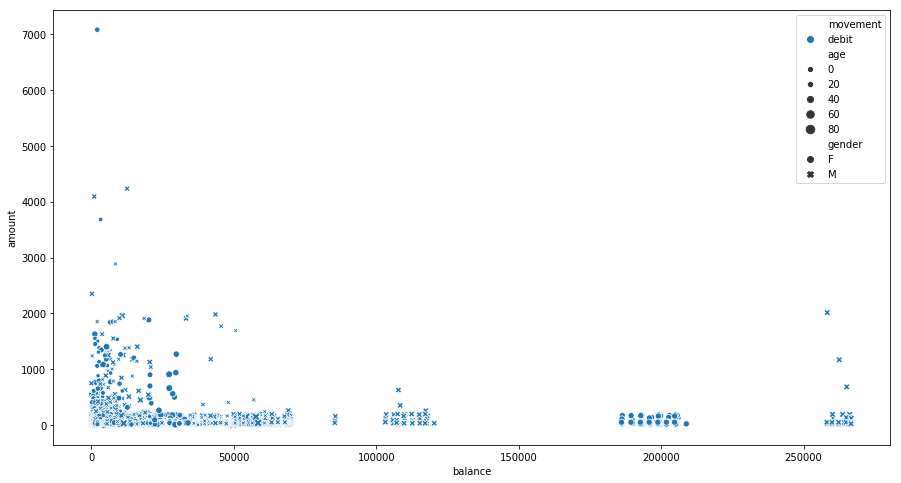

In [214]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x="balance", y="amount", hue="movement", style="gender",size="age",data=df[df['movement']=='debit'])

This is to difficult to understand because of the huge number of outliers. Let's try and normalize amounts and account balance. 

In [223]:
df_log_transformed=df.copy()
df_log_transformed[['amount','balance']]=df[['amount','balance']].apply(lambda x: np.log(x+1))

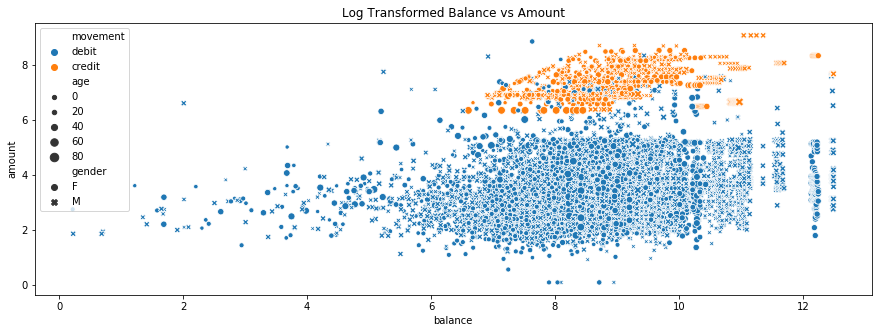

In [296]:
plt.figure(figsize = (15, 5))
sns.scatterplot(x="balance", y="amount", hue="movement", style="gender",size="age",data=df_log_transformed).set_title('Log Transformed Balance vs Amount')
plt.savefig('bal v amoount')

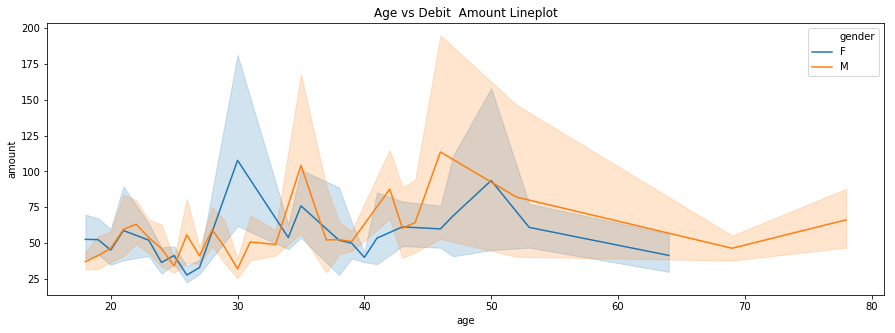

In [290]:
plt.figure(figsize = (15, 5))
sns.lineplot(x="age", y="amount",hue="gender", data=df[df['movement']=='debit']).set_title("Age vs Debit  Amount Lineplot")
plt.savefig('Age vs Debit  Amount Lineplot.png')

In [36]:
salary_df=df[df['txn_description']=='PAY/SALARY']
salary_df=salary_df.drop(['txn_description','card_present_flag','merchant_suburb','merchant_state'],axis=1)
salary_df.head()

,status,account,merchant_id,first_name,balance,gender,age,extraction,amount,transaction_id,customer_id,movement,Long,Lat,Merchant_Long,Merchant_Lat
50,posted,ACC-588564840,NaN,Isaiah,8342.11,M,23,2018-08-01 11:00:00,3903.95,9ca281650e5d482d9e53f85e959baa66,CUS-1462656821,credit,151.27,-33.76,NaN,NaN
61,posted,ACC-1650504218,NaN,Marissa,2040.58,F,23,2018-08-01 12:00:00,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,CUS-2500783281,credit,145.01,-37.93,NaN,NaN
64,posted,ACC-3326339947,NaN,Eric,3158.51,M,22,2018-08-01 12:00:00,983.36,bd62b1799a454cedbbb56364f7c40cbf,CUS-326006476,credit,151.18,-33.80,NaN,NaN
68,posted,ACC-3541460373,NaN,Jeffrey,2517.66,M,24,2018-08-01 13:00:00,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,CUS-1433879684,credit,145.00,-37.83,NaN,NaN
70,posted,ACC-2776252858,NaN,Kristin,2271.79,F,43,2018-08-01 13:00:00,1068.04,f50ccf1195214d14a0acbfcb5a265193,CUS-4123612273,credit,144.95,-37.76,NaN,NaN


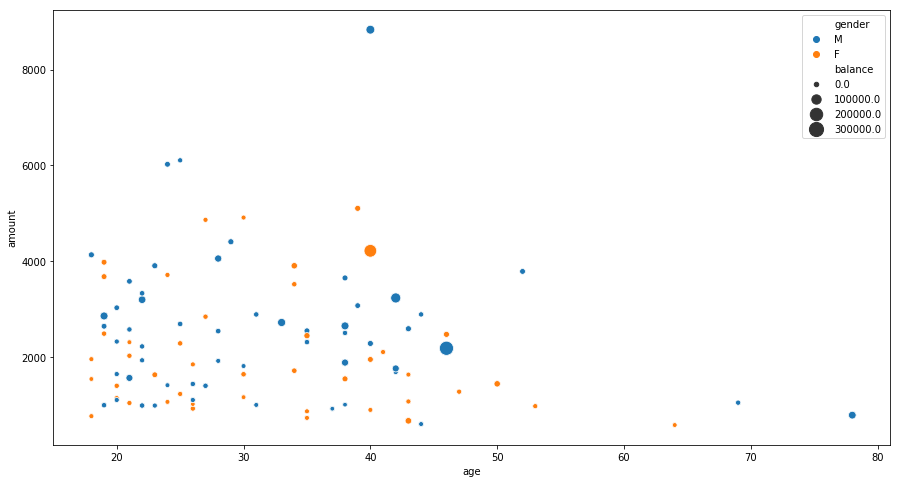

In [281]:
plt.figure(figsize = (15, 8))
sns.scatterplot(x="age", y="amount", hue="gender", size="balance",
                sizes=(20, 200),data=salary_df)

In [283]:
import folium

m = folium.Map(location=[-23.6980,133.8807],zoom_start=4)

In [260]:
#salary_df.balance.quantile([0.25,0.5,0.25])
top_25=salary_df[salary_df['amount']>salary_df.amount.quantile(0.75)]
bottom_25=salary_df[salary_df['amount']<salary_df.amount.quantile(0.25)]

In [284]:
for i in range(0,len(top_25)):
    folium.Circle([top_25.iloc[i]['Lat'], top_25.iloc[i]['Long']], 
                  radius=top_25.iloc[i]['amount'],
                 size=top_25.iloc[i]['amount'],
                 popup=top_25.iloc[i]['amount'],
                  color='black',
                  fill_color='black'
                 ).add_to(m)

In [285]:
for i in range(0,len(bottom_25)):
    folium.Circle([bottom_25.iloc[i]['Lat'], bottom_25.iloc[i]['Long']], 
                  radius=bottom_25.iloc[i]['amount'],
                 size=bottom_25.iloc[i]['amount'],
                 popup=bottom_25.iloc[i]['amount'],
                  color='red',
                  fill_color='red'
                 ).add_to(m)

In [286]:
m.save('top_bottom_25_amount.html')

In [279]:
m = folium.Map(location=[-23.6980,133.8807],zoom_start=4)
top_25=salary_df[salary_df['balance']>salary_df.balance.quantile(0.75)]
bottom_25=salary_df[salary_df['balance']<salary_df.balance.quantile(0.25)]

for i in range(0,len(top_25)):
    folium.Circle([top_25.iloc[i]['Lat'], top_25.iloc[i]['Long']], 
                  radius=top_25.iloc[i]['balance'],
                 size=np.log(top_25.iloc[i]['balance']),
                 popup=top_25.iloc[i]['balance'],
                  color='black',
                  fill_color='black'
                 ).add_to(m)

for i in range(0,len(bottom_25)):
    folium.Circle([bottom_25.iloc[i]['Lat'], bottom_25.iloc[i]['Long']], 
                  radius=bottom_25.iloc[i]['balance'],
                 size=np.log(bottom_25.iloc[i]['balance']),
                 popup=bottom_25.iloc[i]['balance'],
                  color='red',
                  fill_color='red',
                  fill_opacity=0
                 ).add_to(m)

In [282]:
m.save('top_bottom_25_balance.html')